<a href="https://colab.research.google.com/github/sahithinamala/MachineLearning/blob/main/Bacteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torchvision.models as models

In [ ]:
import torch
import torchvision
import cv2
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from glob import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision.transforms.functional import to_tensor
import shutil
import os
import random

In [ ]:
!pip install segmentation-models-pytorch


     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 376 kB 51.3 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=001e59f78fcf928f45af933cfa7651be19f34a3aab789454db88bfbd49bbcdb5
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=22e37ef6d5dd999c75475e4dca51277cdd39dbd110f46d65239406284b346c4d
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
images_path = sorted(os.listdir("/content/drive/MyDrive/images"))
masks_path = sorted(os.listdir("/content/drive/MyDrive/masks"))
len(masks_path)

366

In [ ]:
len(images_path)

366

In [ ]:
# for i in range(len(images_path)):
#    img = cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/images/',images_path[i])),cv2.COLOR_BGR2RGB)
#    mask =  cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/masks/',masks_path[i])),cv2.COLOR_BGR2RGB)
#    im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#    mas = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)


In [ ]:
class Bacteria(Dataset):
  def __init__(self,images_path,masks_path, size,transform = False):
    #self.dataDirectory = data_dir
    
    self.images_path = images_path
    self.masks_path = masks_path
    self.transform = False
    self.size = size
    print(self.images_path)
    print(self.masks_path)
    # self.images_path = images

  def __getitem__(self, idx):
    # path_img = self.images_path[idx]
    # path_mask = self.masks_path[idx]
    # print(self.path_mask)
    # img = cv2.cvtColor(cv2.imread(os.path.join(self.images_path,path_img)),cv2.COLOR_BGR2RGB)
    # mask =  cv2.cvtColor(cv2.imread(os.path.join(self.masks_path,path_mask)),cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(cv2.imread(self.images_path[idx]),cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(cv2.imread(self.masks_path[idx]),cv2.COLOR_BGR2RGB)

   # print(img, mask, img.shape, mask.shape)
    img= cv2.resize(img, self.size)
    mask =  cv2.resize(mask, self.size)
    # image, mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB), split(mask,"/")
    image, mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    if self.transform:
        trans = self.transforms(image=image, mask=mask)
        image, mask = trans['image'], trans['mask']
    image = image/255.0
    image=image.transpose(2,1,0)
    mask=mask.transpose(2,1,0)
    # print(image.shape, mask.shape)
    return torch.tensor(image),torch.tensor(mask)

  def __len__(self):
    return len(self.images_path)


In [ ]:
# train_dataset_0 = Bacteria(X_train,y_train, (512,512))

In [ ]:
# dataset = Bacteria("/content/drive/MyDrive/images/", "/content/drive/MyDrive/masks/", (1500,1500))
import glob
images_path = glob.glob("/content/drive/MyDrive/images/*")
masks_path = glob.glob("/content/drive/MyDrive/masks/*")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_path, masks_path, test_size=0.33, random_state=42)

test_dataset = Bacteria(X_test,y_test, (512,512))


['/content/drive/MyDrive/images/191.png', '/content/drive/MyDrive/images/037.png', '/content/drive/MyDrive/images/009.png', '/content/drive/MyDrive/images/344.png', '/content/drive/MyDrive/images/054.png', '/content/drive/MyDrive/images/210.png', '/content/drive/MyDrive/images/050.png', '/content/drive/MyDrive/images/134.png', '/content/drive/MyDrive/images/147.png', '/content/drive/MyDrive/images/123.png', '/content/drive/MyDrive/images/299.png', '/content/drive/MyDrive/images/047.png', '/content/drive/MyDrive/images/280.png', '/content/drive/MyDrive/images/084.png', '/content/drive/MyDrive/images/127.png', '/content/drive/MyDrive/images/309.png', '/content/drive/MyDrive/images/003.png', '/content/drive/MyDrive/images/293.png', '/content/drive/MyDrive/images/305.png', '/content/drive/MyDrive/images/100.png', '/content/drive/MyDrive/images/020.png', '/content/drive/MyDrive/images/172.png', '/content/drive/MyDrive/images/064.png', '/content/drive/MyDrive/images/259.png', '/content/drive

In [ ]:

train_dataset = Bacteria(X_train,y_train, (512,512))

['/content/drive/MyDrive/images/133.png', '/content/drive/MyDrive/images/039.png', '/content/drive/MyDrive/images/034.png', '/content/drive/MyDrive/images/283.png', '/content/drive/MyDrive/images/206.png', '/content/drive/MyDrive/images/268.png', '/content/drive/MyDrive/images/295.png', '/content/drive/MyDrive/images/166.png', '/content/drive/MyDrive/images/161.png', '/content/drive/MyDrive/images/168.png', '/content/drive/MyDrive/images/040.png', '/content/drive/MyDrive/images/115.png', '/content/drive/MyDrive/images/162.png', '/content/drive/MyDrive/images/011.png', '/content/drive/MyDrive/images/312.png', '/content/drive/MyDrive/images/247.png', '/content/drive/MyDrive/images/018.png', '/content/drive/MyDrive/images/155.png', '/content/drive/MyDrive/images/097.png', '/content/drive/MyDrive/images/078.png', '/content/drive/MyDrive/images/209.png', '/content/drive/MyDrive/images/187.png', '/content/drive/MyDrive/images/182.png', '/content/drive/MyDrive/images/229.png', '/content/drive

In [ ]:
# for y in train_loader:
#   print((y[0]).shape)
  
#   break

In [ ]:
train_dataset.__len__(),test_dataset.__len__()

(245, 121)

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
# resnet = models.resnet18(pretrained=True)
# fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = None
CLASSES = 3
ENCODER_DEPTH = 5
DECODER_CHANNELS = [256, 128, 64, 32, 16]

manet_resnet34 = smp.MAnet(
    encoder_name = ENCODER,
    encoder_weights = ENCODER_WEIGHTS,
    classes = CLASSES, 
    activation = ACTIVATION, 
    encoder_depth = ENCODER_DEPTH, 
    decoder_channels = DECODER_CHANNELS)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:

# import functools
# res = functools.reduce(lambda sub, ele: sub * 1+ ele, train_dataset)
train_loader = DataLoader(train_dataset, batch_size=8)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=1)

In [ ]:
for j in test_loader:
  print(j[0].shape, j[1].shape)
  break

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


In [ ]:
import torch 
import numpy as np
# model = resnet.cuda()
if torch.cuda.is_available():
    model = manet_resnet34.cuda()
criteria = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 0 Batch_Loss 0.741756796836853
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 1 Batch_Loss 0.5490288734436035
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 2 Batch_Loss 0.49152684211730957
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 3 Batch_Loss 0.3935468792915344
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 4 Batch_Loss 0.2705020010471344
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 5 Batch_Loss 0.20133814215660095
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 6 Batch_Loss 0.16470776498317719
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 7 Batch_Loss 0.21028849482536316
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 8 Batch_Loss 0.1597156822681427
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 9 Batch_Loss 0.17804810404777527
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 10 Batch_Loss 0.20235268771648407
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 11 Batch_Loss 0.1947607696056366
torch.Size([8, 3, 512, 512])
Epoch: 0  Batch: 12 Batch_Lo

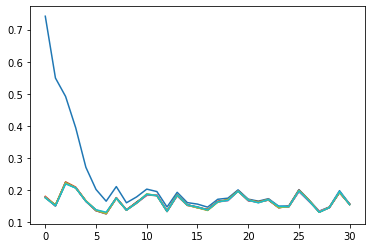

In [ ]:

from matplotlib import pyplot as plt
EPOCHS = 10
model = model.cuda()
model.train()
losses = []
for epoch in range(EPOCHS):
  l = []
  for i,(x,y) in enumerate(train_loader):
    # x = x.float()
    # y = y.float()
    # x = x.transpose(2, 1)
    
    print(x.shape)
    x = x.cuda().float()
    # x=x.transpose(2,1,0)
    # x = x.float()
    y = y.cuda().float()
    # y = y.float()
    
    # y.unsqueeze_(0)
    # model(x.permute(0, 3, 1, 2))
    # model(y.permute(0, 3, 1, 2))

    y_pred = model(x)


    optimizer.zero_grad()
    loss = criteria(y,y_pred)
    loss.backward()
    optimizer.step()
    
    l.append(loss.item())
    del x,y,y_pred
    print('Epoch:',epoch,' Batch:',i,'Batch_Loss',l[-1])
    # plt.plot(l)
  plt.plot(l)

  # plt.plot(l)
  av = np.mean(l)
  print('Epoch:',epoch,'-'*8,'Epoch_Loss:',av)
  losses.append(av)

In [ ]:
torch.save(model.state_dict(), './model.pth')

In [ ]:
for f in test_loader:
  data=f[0].cuda().float()
  ll = f[1].squeeze().detach().cpu().numpy()
  predictions = model.predict(data)
  pred=predictions.squeeze().detach().cpu().numpy()
  break

In [ ]:
pred.shape, predictions.shape, ll.shape

((3, 512, 512), torch.Size([1, 3, 512, 512]), (3, 512, 512))

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
data_arr=data.detach().squeeze().cpu().numpy()
data_arr.shape
data_arr=data_arr.transpose(1,2,0)
data_arr.shape

(512, 512, 3)

In [ ]:
np.max(data_arr), np.min(data_arr)
data_arr= np.where(data_arr<1,255,0)

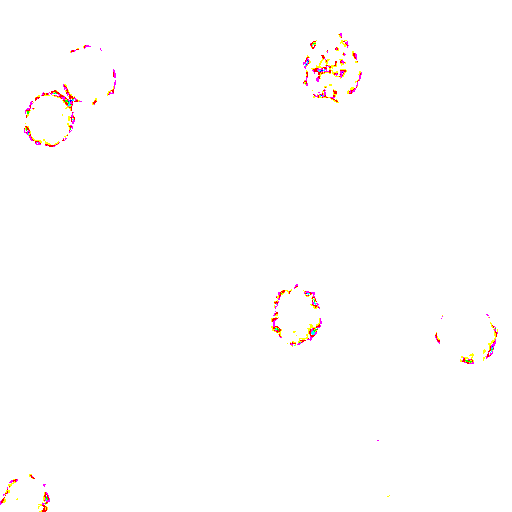

In [ ]:
cv2_imshow(data_arr)

In [ ]:
np.max(pred), np.min(pred)

(0.3160704, -0.09218275)

In [ ]:
pred1=np.where(pred<0.2,255,0)

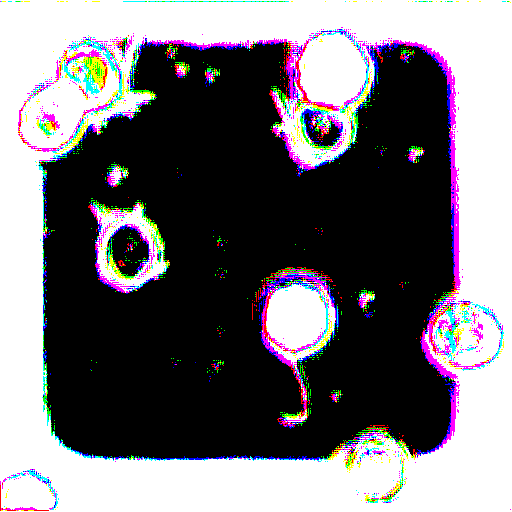

In [ ]:
cv2_imshow(pred1.transpose(1,2,0))

In [ ]:
np.max(ll), np.min(ll)

(2, 0)

In [ ]:
ll=np.where(ll<2,255,0)

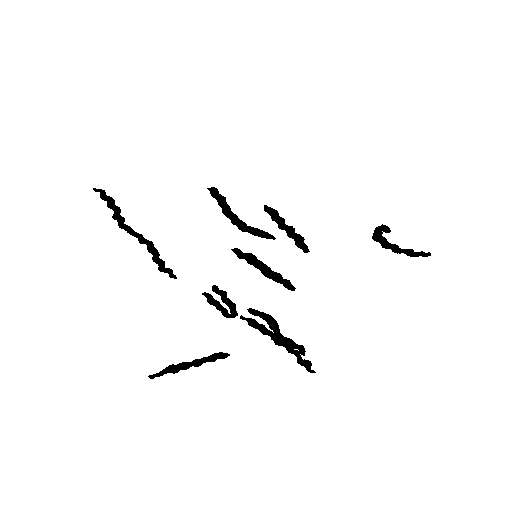

In [ ]:
cv2_imshow(ll.transpose(1,2,0))

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
y.shape

torch.Size([8, 3, 512, 512])

In [ ]:
x.shape

torch.Size([8, 3, 512, 512])

In [ ]:
torch.cuda.reset_max_memory_cached()

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:300: FutureWarning: torch.cuda.reset_max_memory_cached now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)
